url Dashboard: https://public.tableau.com/views/h8dsft_Milestone1_17098098523270/Dashboard1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

#  Milestones 1

Nama    : Rizky Chester Abadi

Batch   : RMT-029

Program ini dibuat untuk menyelesaikan suatu permasalahan dari client dengan analisa dan statistik serta visualisasi dashboard


### Identifikasi Masalah

Topik Permasalahannya: Client ingin membuka cabang Franchise dalam bidang foods and beverage di Istanbull. Dia ingin mengetahui Mall mana yang cocok untuk membuka Franchise tersebut berdasarkan data pembelian barang dari tahun 01-01-2021 hingga 08-03-2023.

Problem Statement: Melihat Preferensi jenis Barang yang dibeli di Mall-Mall Istanbul antara Pria dan Wanita dalam kurun waktu tahun 2021 hingga 2023. Data akan digunakan oleh client untuk menentukan di mal mana saja dia akan membuka cabang franchise yaitu dalam bidang foods and beverage. 

Penjabaran dengan metode SMART:

    Specific: 
        Analisis preferensi dari jenis barang yang dibeli di Mall-Mall Istanbul antara Pria dan Wanita dalam kurun waktu Awal tahun 2021 hingga 2023  Quartal Pertama. Datanya akan digunakan untuk menentukan lokasi Mall di Istanbul yang cocok untuk membuka cabang franchise client dalam bidang foods and beverage.
    Measurable:
        Mengukur pembelian barang foods and beverage antara pria dan wanita di mall-mall istanbul.Analisis akan mencakup perbandingan jumlah pembelian barang yang paling diminati oleh masing-masing gender.Data juga melihat tren barang dalama kurun waktu 2021 hingga 2023.

    Achieavable:
        Data pembelian barang dapat diperoleh dari data penjualan yang tercatat di Mall-Mall Istanbul. Analisis dapat dilakukan dengan menggunakan metode Analisis dan perhitungan statistik yang tepat.


    Relevant: 
        Analasis ini dapat membantu client untuk mengetahui info preferensi pembelian antara pria dan wanita untuk menentukan lokasi mall di Istanbull yang sesuai.

    Time-Bound: Analasis dilakukan dengan data kurun waktu 01-01-2021 hingga 08-03-2023. 

Penjabaran Masalah dengan 5W+1H:
    * Who:Antara Pria(Male) dan Wanita(Female) siapakah yang lebih banyak membeli produk Foods and Beverage di mall? (dengan statistik inferential)

    * Where: Mall manakah yang dapat dijadikan tempat untuk membuka fanchise foods and beverage client?(dengan statistik deskriptif)

    * What: Apakah jenis barang(khususnya foods and beverage) yang sering dibeli mall-mall Istanbul? (visualisasi data)

    * Why: Untuk membantu client dalam menentukan lokasi Mall mana di Istanbul yang cocok sebagai tempat dibukanya franchise foods and beverage.(Visualisasi data)

    * When: Melihat pembelian food & beverage Selama periode 01-01-2021 hingga 08-03-2023. (Visualisasi data) 
    
    * How: Dengan mencari data banyaknya Barang food & beverage yang dibeli antara pria dan wanita di Mall-Mall Istanbul selama periode yang ditentukan.(Visualisasi data)

### Data Loading

In [136]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

mengimport ekstensi yang akan digunakan untuk membantu menganalisa dan mengolah data

In [137]:
# Mengakses data yang akan di analisa
dfMall = pd.read_csv(r'C:\Users\rizqc\Documents\CSV\Customer Shopping Data - Istanbul\customer_shopping_data.csv')

dfMall

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


Menampilkan data pembelian barang di beberapa Mall Istanbul di tahun 2021 hingga 2023 antara gender Pria dan Wanita.

Sumber data : https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset

### Data Cleaning

In [138]:
dfMall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


Menampilkan tipe data masing-masing kolom

In [139]:
#mengubah tipe data invoice date
dfMall['invoice_date'] = pd.to_datetime(dfMall['invoice_date'], format='%d/%m/%Y')

Mengubah tipe data invoice menjadi datetime

In [140]:
#cek missing value
dfMall.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [141]:
#cek missing value dengan isnull
dfMall.isnull()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
99452,False,False,False,False,False,False,False,False,False,False
99453,False,False,False,False,False,False,False,False,False,False
99454,False,False,False,False,False,False,False,False,False,False
99455,False,False,False,False,False,False,False,False,False,False


tidak ada missing value di tiap kolom

In [142]:
dfMall.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [143]:
#Menambah kolom Year berdasarkan kolom invoice_date
dfMall['year'] = dfMall['invoice_date'].dt.year
dfMall = dfMall[dfMall['year'].isin([2021, 2022, 2023])]

In [144]:
#Membuat dataframe baru dengan kolom-kolom dengan hanya menyertakan kolom-kolom yang digunakan untuk perhitungan
dfMall_clean = dfMall[['gender','category','quantity','price','invoice_date','year','shopping_mall']]
dfMall_clean

,gender,category,quantity,price,invoice_date,year,shopping_mall
0,Female,Clothing,5,1500.40,2022-08-05,2022,Kanyon
1,Male,Shoes,3,1800.51,2021-12-12,2021,Forum Istanbul
2,Male,Clothing,1,300.08,2021-11-09,2021,Metrocity
3,Female,Shoes,5,3000.85,2021-05-16,2021,Metropol AVM
4,Female,Books,4,60.60,2021-10-24,2021,Kanyon
...,...,...,...,...,...,...,...
99452,Female,Souvenir,5,58.65,2022-09-21,2022,Kanyon
99453,Male,Food & Beverage,2,10.46,2021-09-22,2021,Forum Istanbul
99454,Male,Food & Beverage,2,10.46,2021-03-28,2021,Metrocity
99455,Male,Technology,4,4200.00,2021-03-16,2021,Istinye Park


membuat Dataframe baru dan hanya mengambil kolom-kolom yang akan di analisa

In [145]:
# Membuat dataframe hanya dengan attribute Food & Beverage di kolom category
dffood = dfMall_clean[dfMall_clean['category'] == 'Food & Beverage']
dffood


,gender,category,quantity,price,invoice_date,year,shopping_mall
10,Female,Food & Beverage,2,10.46,2022-12-25,2022,Metrocity
17,Female,Food & Beverage,3,15.69,2022-01-05,2022,Zorlu Center
21,Female,Food & Beverage,1,5.23,2021-05-01,2021,Cevahir AVM
35,Male,Food & Beverage,1,5.23,2023-01-04,2023,Emaar Square Mall
40,Female,Food & Beverage,3,15.69,2021-09-10,2021,Zorlu Center
...,...,...,...,...,...,...,...
99441,Male,Food & Beverage,4,20.92,2023-03-02,2023,Zorlu Center
99445,Female,Food & Beverage,5,26.15,2021-05-07,2021,Kanyon
99446,Female,Food & Beverage,1,5.23,2023-02-05,2023,Metropol AVM
99453,Male,Food & Beverage,2,10.46,2021-09-22,2021,Forum Istanbul


Membuat dataframe baru memperlihatkan khusus berdasarkan data Food & Beverage yang akan di analisa dan menyimpan dalam dataframe dffood

### Analisa dan Perhitungan

#### Penjabaran dengan statistik deskriptif 

Dengan menggunakan metode Distribution discrete untuk melihat Mall manakah yang dapat dijadikan tempat untuk membuka fanchise food & beverage client

In [146]:
# mencari modus dari kolom shoppping_mall
dffood['shopping_mall'].mode()

0    Mall of Istanbul
Name: shopping_mall, dtype: object

dari modus dari kolom shopping_mall adalah Mall of Istanbul

In [147]:
# menghitung value count
dffood['shopping_mall'].value_counts()


shopping_mall
Mall of Istanbul     2957
Kanyon               2909
Metrocity            2244
Metropol AVM         1517
Istinye Park         1490
Cevahir AVM           772
Zorlu Center          750
Viaport Outlet        733
Forum Istanbul        712
Emaar Square Mall     692
Name: count, dtype: int64

dari dari modus dan valuecounts yang didapat dari kolom shopping_mall dapat dikatakan bahwa food & beverage lebih banyak dibeli konsumen di Mall of Istanbul

Hasil dari analisa dengan Statistik Deskriptif Distribution Discrete menunjukkan bahwa Category Food & Beverage lebih banyak diminati konsumen di lokasi Mall of Istanbul dibandingkan Mall-Mall yang lain

#### Penjabaran dengan Statistik Inferensial

Metode Hypothesis Two Sample Independent Test

Dengan menggunakan metode Two Sample Independet Test untuk melihat mana Antara Pria(Male) dan Wanita(Female) siapakah yang rata-rata lebih banyak membeli produk Foods and Beverage di tiap mall

In [148]:
#Menghitung total Belanja
dffood['Total'] = dffood['quantity']*dffood['price']

#Membuat dua Variable untuk membandingkan yang paling banyak membeli food & beverage
Male_cost = dffood[dffood['gender'] =='Male'][['Total','shopping_mall']].groupby('shopping_mall').sum()
Female_cost = dffood[dffood['gender'] =='Female'][['Total','shopping_mall']].groupby('shopping_mall').sum()

print('Rata-rata Belanja Pelanggan Pria di shopping_mall adalah: ', Male_cost['Total'].mean())
print('Rata-rata Belanja Pelanggan Wanita di shopping_mall adalah: ', Female_cost['Total'].mean())

Rata-rata Belanja Pelanggan Pria di shopping_mall adalah:  34421.245
Rata-rata Belanja Pelanggan Wanita di shopping_mall adalah:  50532.26000000001


C:\Users\rizqc\AppData\Local\Temp\ipykernel_27520\3954219673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffood['Total'] = dffood['quantity']*dffood['price']


Dari hasil analisa Statistik Deskriptif dapat dikatakan bahwa rata-rata total pembelian food & beverage di shopping_mall pelanggan Wanita lebih besar dari pelanggan Pria. 

H0: Rata-rata belanja pelanggan Pria == Wanita di tiap Mall 

H1: Rata-rata belanja pelanggan Pria != Wanita di tiap Mall 

##### Visualisasi data untuk melihat apakah jenis barang yang sering dibeli di mall-mall istanbull (khususnya food & beverage)

In [149]:
#Menghitung P-value
t_stat, p_val = stats.ttest_ind(Male_cost['Total'],Female_cost['Total'])
print('T-Statistic:',t_stat)
print('P-value:',p_val) 

T-Statistic: -1.3186896255475202
P-value: 0.20380565102042691


In [150]:
print('modus of category:',dfMall_clean['category'].mode())

modus of category: 0    Clothing
Name: category, dtype: object


dari perhitungan modus kolom category, Attribute yang sering muncul adalah clothing. Jadi barang yang sering dibeli di mall-mall Istanbul adalah tipe Clothing

In [151]:
dfMall_clean['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

Jenis barang yang sering dibeli dari tiap Customer di Mall-Mall Istanbul adalah clothing sebanyak 34487 kali,  untuk food & beverage sebanyak 14776 kali 

<Axes: xlabel='category'>

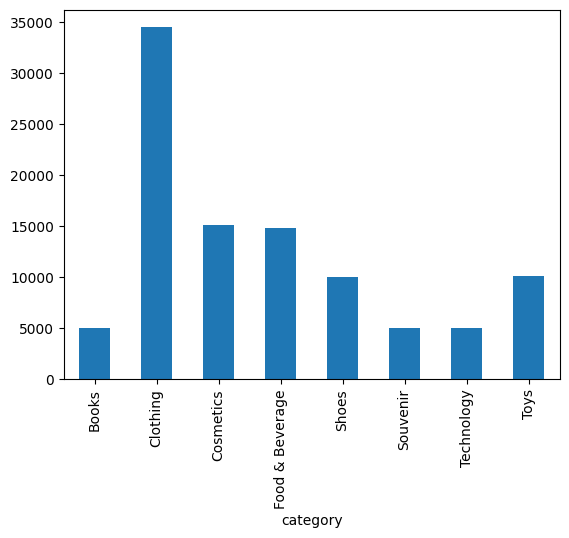

In [152]:
# menggunakan distributions discrete 
dfMall_clean['category'].value_counts().sort_index().plot(kind='bar')


Bar chart untuk menggambarkan Category baranag mana yang paling banyak dibeli oleh pelanggan Mall-Mall di Istanbul

##### Visualisasi Data Untuk membantu client dalam menentukan lokasi Mall mana di Istanbul yang cocok sebagai tempat dibukanya franchise foods and beverage.

<Axes: xlabel='shopping_mall'>

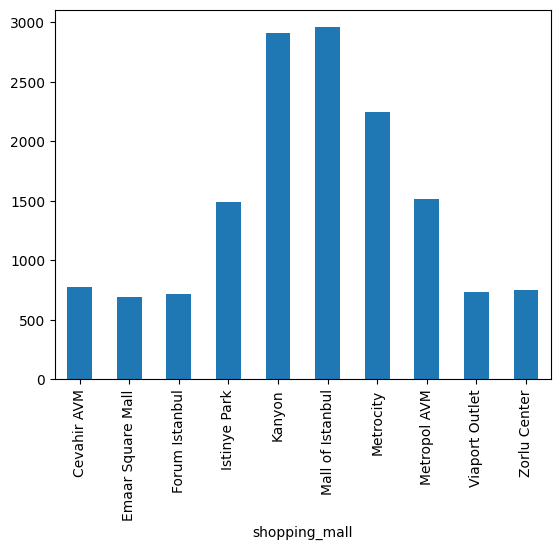

In [153]:
# dengan menggunakan distribusi discrete
dffood['shopping_mall'].value_counts().sort_index().plot(kind='bar')

dapat dilihat bahwa Mall of Istanbul merupakan Mall yang cocok untuk dibukanya Franchise food & beverage client karena pelanggan mempunyai daya beli food & beverage yang tinggi

##### Visualisasi untuk Melihat pembelian food & beverage Selama periode 01-01-2021 hingga 08-03-2023.

<Axes: xlabel='year'>

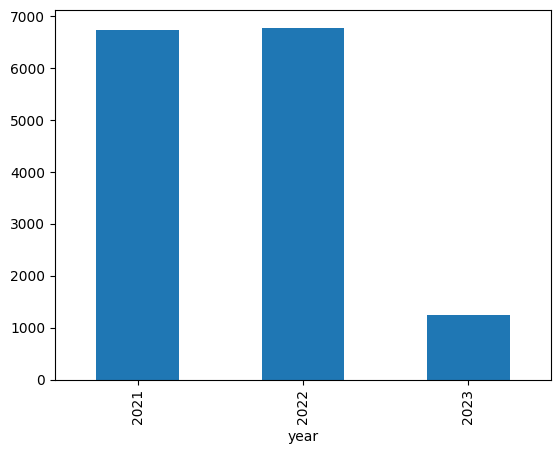

In [154]:
dffood['year'].value_counts().sort_index().plot(kind='bar')

Dapat dilihat bahwa tahun 2022 merupakan tahun dimana jumlah pembelian Food & beverage paling tinggi dibandingkan 2021 dan 2023, hal ini juga dikarenakan di tahun 2023 datanya hanya 1 quartal

##### Visualisasi menjabarkan data banyaknya Barang food & beverage yang dibeli antara pria dan wanita di Mall-Mall Istanbul selama periode yang ditentukan

<Axes: ylabel='count'>

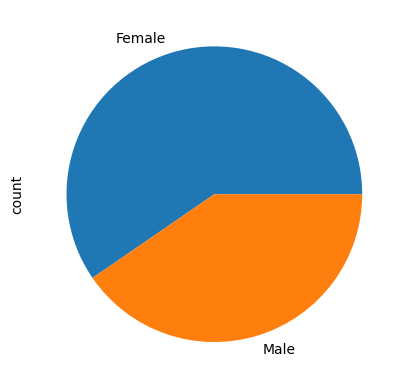

In [162]:
dffood['gender'].value_counts().sort_index().plot(kind='pie')

dari pie chart Dapat dilihat bahwa Jumlah belanja food & beverage oleh pelanggan Wanita lebih besar dibandingkan dengan pelanggan pria.

### Pengambilan Kesimpulan

Hasil dari analisa-analisa terkait data pengunjung Mall-Mall di Istanbul pada periode 01-01-2021 hingga 03-08-2023 adalah Pelanggan Wanita lebih banyak belanja terutama terkait produk Food & Beverage di Mall-Mall Istanbul di bandingkan pelanggan pria. Kategori barang yang paling diminati oleh pelanggan Mall-Mall di Istanbul adalah kategori Clothing sedangkan Food & Beverage berada di peringkat ke-3 dengan perbedaan sedikit dengan Cosmetic. Mall yang sering dikunjungi oleh para pelanggan dari kedua gender terkait pembelian food & beverage adalah Mall of Istanbul. Dalam waktu yang ditentukan Tingkat Pelanggan yang datang paling tinggi di tahun 2022. Dengan demikian dapat disimpulkan bahwa jika Client ingin membuka Fanchise Food & Beverage miliknya maka dapat dilakukan di lokasi Mall of Istanbul mengingat tingkat pembelian produk Food & Beveragenya sangat tinggi.

In [163]:
dffood.to_csv('foodbev_shoppingmall.csv', index=False)

convert dataframe ke csv

In [164]:
dfMall_clean.to_csv('shoppingmall_istanbul.csv', index=False)

convert dataframe ke csv